<div style="font-family: Calibri; font-size: 16px; background-color: #ccd5ae; padding: 10px 10px;">
    <h1>Feature Selection</h1>
<div>

In [273]:
import pandas as pd
import numpy as np
import warnings
from sklearn import set_config
from sklearn.dummy import DummyClassifier
from scripts.plot import plot_two_score

In [274]:
warnings.filterwarnings("ignore") 
set_config(display='diagram')
pd.options.display.precision=3
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px;">
    <h2>Loading Train and Test dataset</h2>
    <p>Train-Test split is not required, as both dataset provided are separate.</p>
</div>

In [275]:
df = pd.read_csv("data/train.csv" )

In [276]:
X_train = df.drop(columns=['Default', 'LoanID'])
y_train = df['Default']

In [277]:
y_train.shape

(255347,)

In [278]:
df_test = pd.read_csv("data/test.csv")

In [279]:
X_test = df.drop(columns=['Default', 'LoanID'])
y_test = df['Default']

<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px;">
    <h2>1. Categorial Data</h2>    
</div>

In [8]:
X_train.select_dtypes(exclude=['int64', 'float64'])

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...
255342,Bachelor's,Full-time,Married,No,No,Other,No
255343,High School,Part-time,Divorced,No,No,Home,No
255344,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,High School,Part-time,Single,Yes,Yes,Other,No


In [75]:
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest,SelectPercentile

In [50]:
X_dummy = pd.get_dummies(X_train.select_dtypes(exclude=['int64', 'float64']), columns=X_train.select_dtypes(exclude=['int64', 'float64']).columns)
X_dummy.sample()

,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
114648,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True


In [51]:
selector = SelectKBest(chi2, k=22)  # Select top 2 features
selector.fit(X_dummy, y_train)

SelectKBest(k=22, score_func=<function chi2 at 0x13826b420>)

In [52]:
selector_2 = SelectKBest(mutual_info_classif, k=20)
selector_2.fit(X_dummy, y_train)

SelectKBest(k=20, score_func=<function mutual_info_classif at 0x1382693a0>)

In [53]:
df = pd.DataFrame({"columns": X_dummy.columns, "chi_score": selector.scores_, "score": selector_2.scores_}).sort_values(by = ['chi_score','score'], ascending=False)
df = df.set_index('columns')

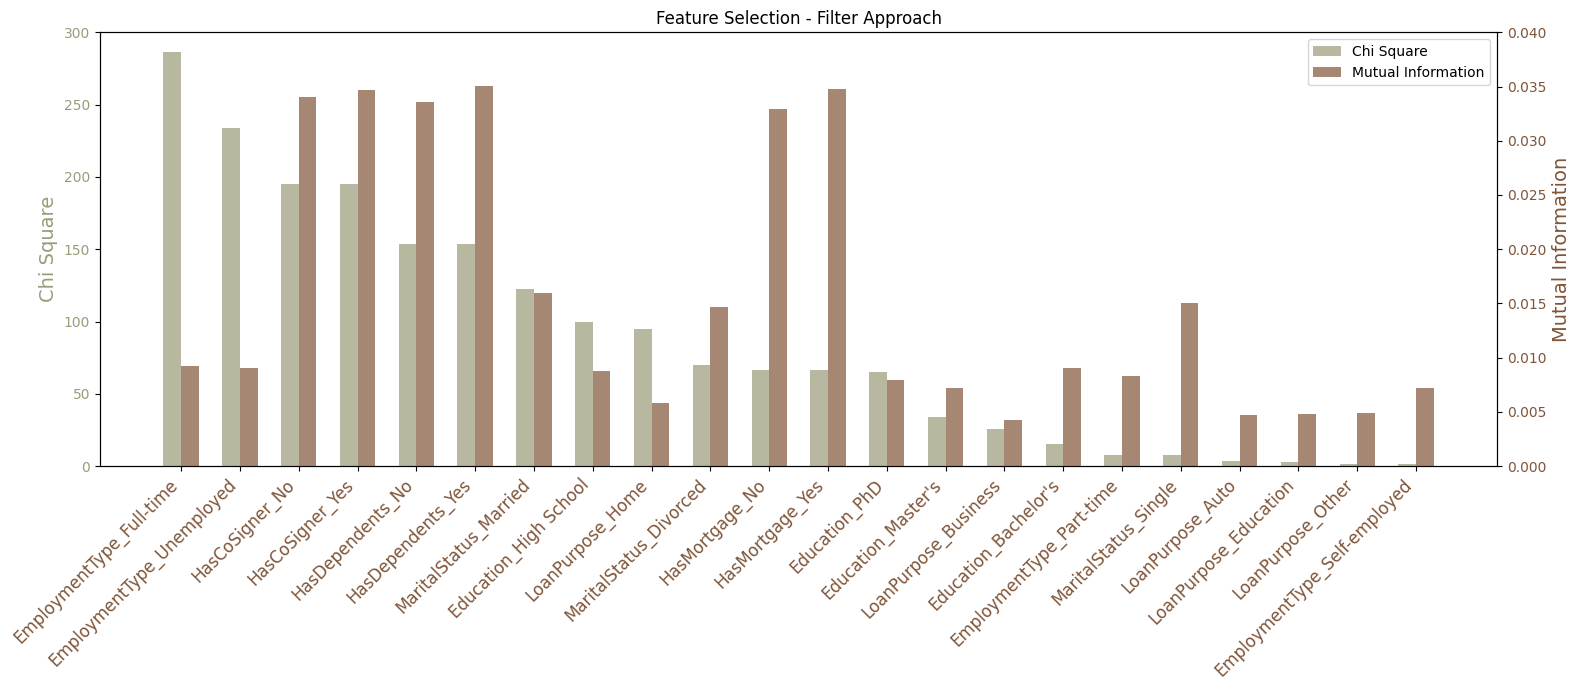

In [54]:
plot_two_score(df, 'chi_score', (0,300), "Chi Square", 'score', (0, 0.04), "Mutual Information" ,"Feature Selection - Filter Approach")

In [55]:
selector_3 = SelectPercentile(chi2, percentile=70)  # Select top 2 features
selector_3.fit(X_dummy, y_train)

SelectPercentile(percentile=70, score_func=<function chi2 at 0x13826b420>)

In [56]:
selector_4 = SelectPercentile(mutual_info_classif, percentile=70)  # Select top 2 features
selector_4.fit(X_dummy, y_train)

SelectPercentile(percentile=70,
                 score_func=<function mutual_info_classif at 0x1382693a0>)

In [63]:
df2 = pd.DataFrame({"columns": X_dummy.columns, "chi_score": selector_3.scores_, "score": selector_4.scores_}).sort_values(by = ['chi_score','score'], ascending=False)
df2 = df2.set_index('columns')

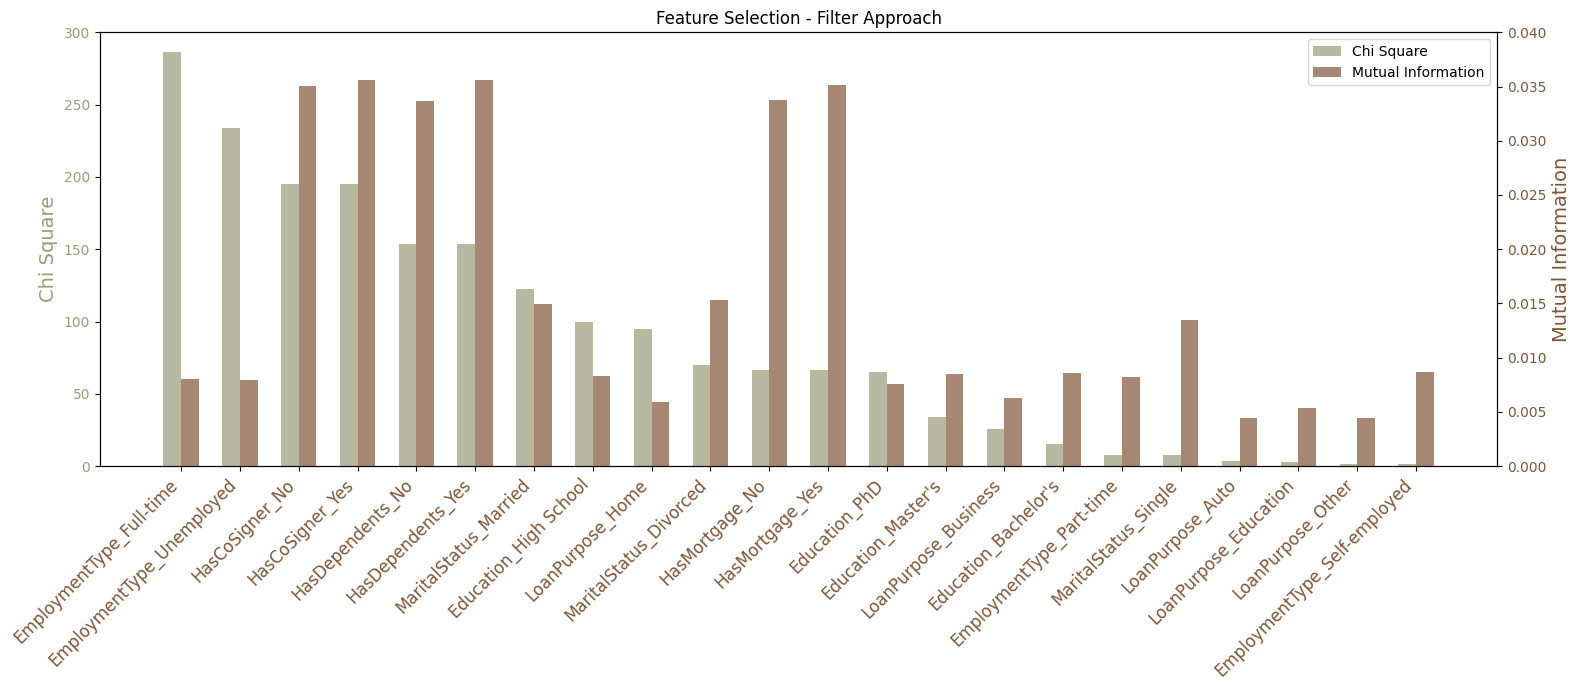

In [64]:
plot_two_score(df2, 'chi_score', (0,300), "Chi Square", 'score', (0, 0.04), "Mutual Information" ,"Feature Selection - Filter Approach")

In [57]:
set1 = set(selector_3.get_feature_names_out().tolist())
set2 = set(selector_4.get_feature_names_out().tolist())
combined_set = set1.union(set2)

In [58]:
[x for x in X_dummy.columns if x not in combined_set]

['LoanPurpose_Auto', 'LoanPurpose_Education', 'LoanPurpose_Other']

In [73]:
set1 = set(df2.sort_values('chi_score', ascending=False)[:15].index.tolist())
set2 = set(df2.sort_values('score', ascending=False)[:15].index.tolist())
common_set = set1.intersection(set2)

In [74]:
common_set

{'Education_High School',
 "Education_Master's",
 'EmploymentType_Full-time',
 'HasCoSigner_No',
 'HasCoSigner_Yes',
 'HasDependents_No',
 'HasDependents_Yes',
 'HasMortgage_No',
 'HasMortgage_Yes',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married'}

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Feature Selection - Both filters have determined following below variables have least impact on target variable </h3>    
    <ul>
        <li>Below variables have least impact on target variable. These are bottom 30% in both filters</li>
        <ul>
            <li>LoanPurpose (Auto, Education, Others)</li>
        </ul>            
        <li>Highest impact features on target variable, these are top 10 by both filters</li>
        <ul>
            <li>Education (High School, Master's)</li>            
            <li>EmploymentType (Full-time)</li>
            <li>HasDependents (Yes, No)</li>
            <li>HasCoSigner (Yes, No)</li>
            <li>HasMortgage (Yes, No)</li>
            <li>MaritalStatus_(Married, Divorced)</li>
        </ul>            
    </ul>    
</div>

<div style="font-family: Calibri; font-size: 16px; background-color: #faedcd; padding: 5px;">
    <h2>2. Numerical Data</h2>    
</div>

In [76]:
from sklearn.feature_selection import  f_classif

In [79]:
X_train_num = X_train.select_dtypes(exclude=['object'])

In [80]:
# Use SelectKBest with f_classif to select the top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X_train_num, y_train)

In [84]:
# Get the scores and p-values for each feature
f_values, p_values = f_classif(X_train_num, y_train)
print("F-values for each feature:", f_values)
print("P-values for each feature:", p_values)

F-values for each feature: [7.39648559e+03 2.53357244e+03 1.93210293e+03 2.98425172e+02
 2.44427088e+03 2.05097644e+02 4.47741696e+03 7.57597555e-02
 9.45184884e+01]
P-values for each feature: [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.92442171e-67
 0.00000000e+00 1.68085616e-46 0.00000000e+00 7.83128315e-01
 2.44991611e-22]


In [90]:
pd.DataFrame({"f_values": f_values, "p_values":p_values}, index=selector.feature_names_in_).sort_values('f_values', ascending=False)

,f_values,p_values
Age,7396.486,0.000
InterestRate,4477.417,0.000
Income,2533.572,0.000
MonthsEmployed,2444.271,0.000
LoanAmount,1932.103,0.000
CreditScore,298.425,0.000
NumCreditLines,205.098,0.000
DTIRatio,94.518,0.000
LoanTerm,0.076,0.783


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import constants.constants as plot

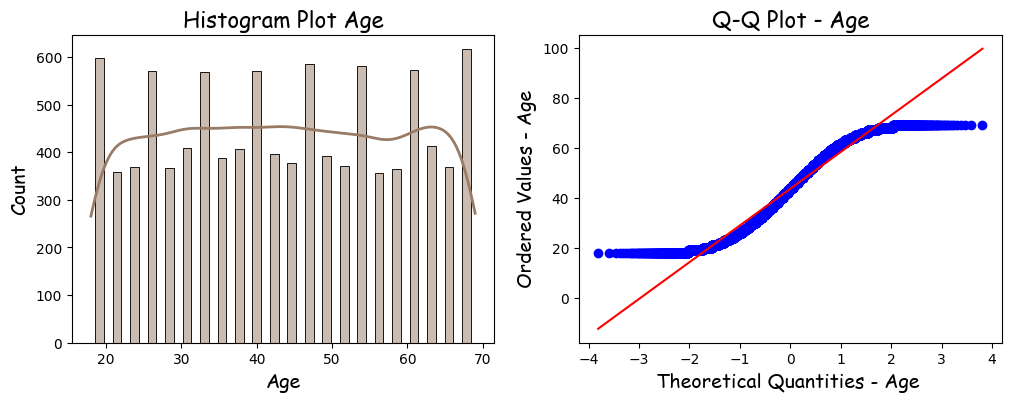

Shapiro-Wilk Test (p-value): 		0.0000000000
Kolmogorov-Smirnov Test (p-value): 	0.0000000000
D'Agostino-Pearson Test (p-value): 	0.0000000000
Skewness: 				0.0020843059
Kurtosis: 				-1.1911593186


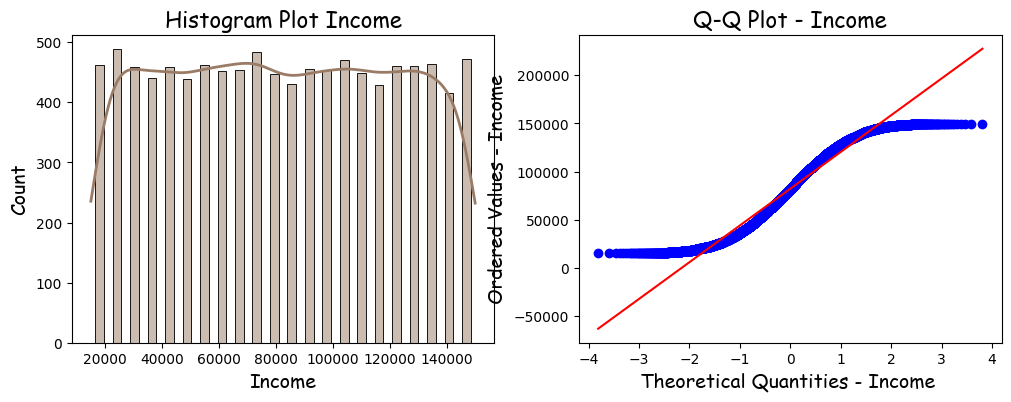

Shapiro-Wilk Test (p-value): 		0.0000000000
Kolmogorov-Smirnov Test (p-value): 	0.0000000000
D'Agostino-Pearson Test (p-value): 	0.0000000000
Skewness: 				0.0092639075
Kurtosis: 				-1.1969415168


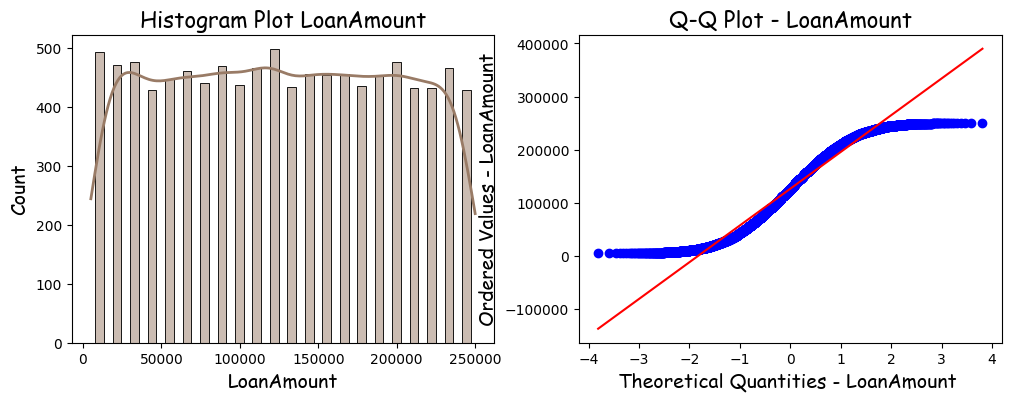

Shapiro-Wilk Test (p-value): 		0.0000000000
Kolmogorov-Smirnov Test (p-value): 	0.0000000000
D'Agostino-Pearson Test (p-value): 	0.0000000000
Skewness: 				0.0069979365
Kurtosis: 				-1.1931371910


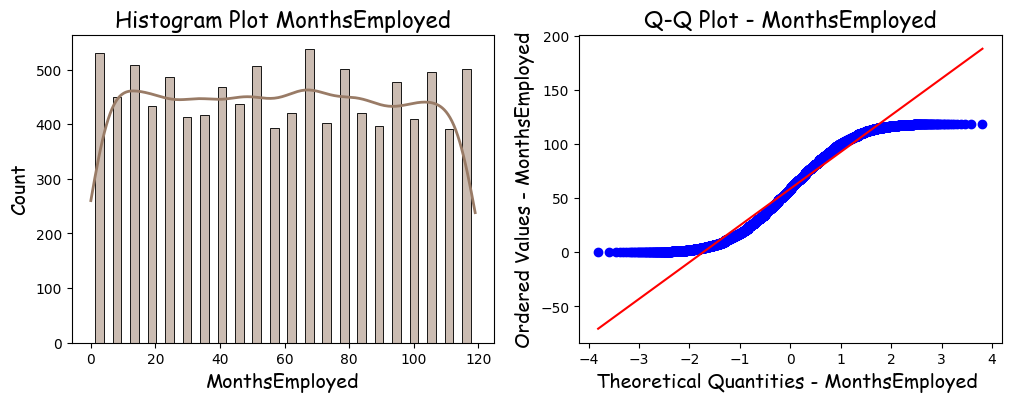

Shapiro-Wilk Test (p-value): 		0.0000000000
Kolmogorov-Smirnov Test (p-value): 	0.0000000000
D'Agostino-Pearson Test (p-value): 	0.0000000000
Skewness: 				0.0139473579
Kurtosis: 				-1.1973704464


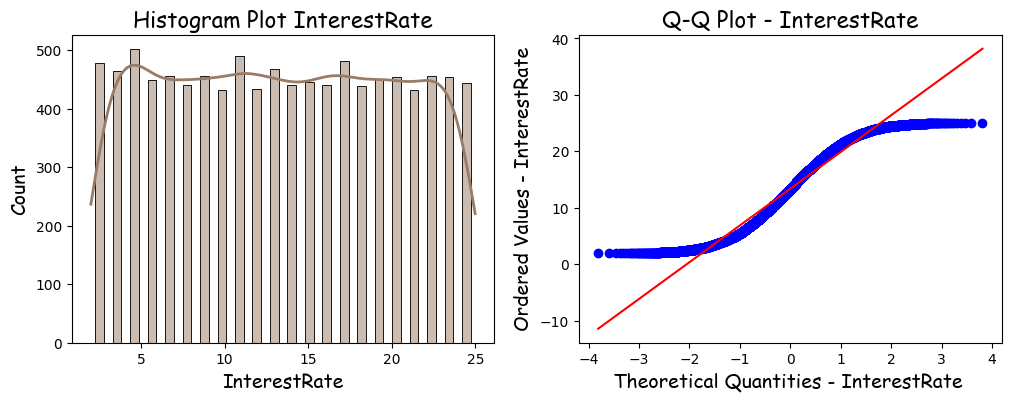

Shapiro-Wilk Test (p-value): 		0.0000000000
Kolmogorov-Smirnov Test (p-value): 	0.0000000000
D'Agostino-Pearson Test (p-value): 	0.0000000000
Skewness: 				0.0132096113
Kurtosis: 				-1.2057030692


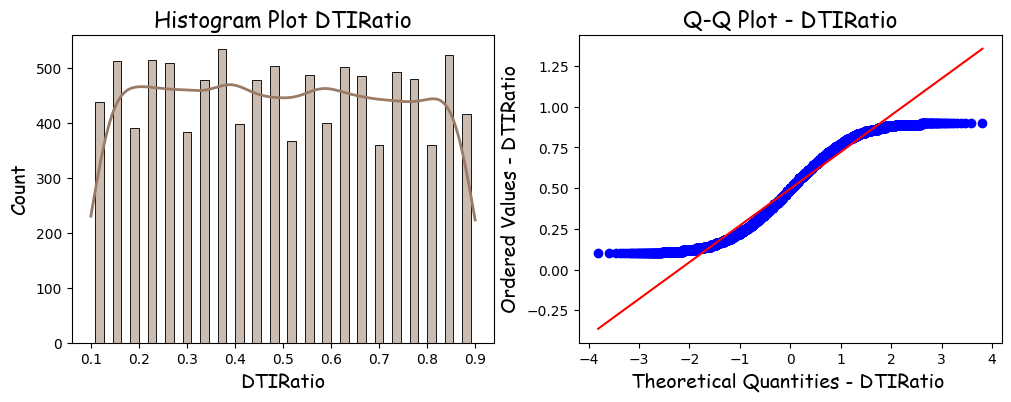

Shapiro-Wilk Test (p-value): 		0.0000000000
Kolmogorov-Smirnov Test (p-value): 	0.0000000000
D'Agostino-Pearson Test (p-value): 	0.0000000000
Skewness: 				0.0226660950
Kurtosis: 				-1.2002936612


In [185]:
for col in X_train.select_dtypes(exclude=['object']).drop(columns=['LoanTerm', 'CreditScore', 'NumCreditLines']).columns:
    data = X_train[col].sample(10000)

    fix, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data, kde=True, color='#997b66', line_kws={ 'linewidth': 2, 'alpha': 1}, shrink=0.5, ax=ax[0])

    ax[0].set_title(f'Histogram Plot {col}', fontname=plot.FONT, fontsize=plot.TITLE_FONT_SIZE)
    ax[0].set_xlabel(f'{col}', fontname=plot.FONT, fontsize=plot.LABEL_FONT_SIZE)
    ax[0].set_ylabel('Count', fontname=plot.FONT, fontsize=plot.LABEL_FONT_SIZE)

    stats.probplot(data, dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q Plot - {col}', fontname=plot.FONT, fontsize=plot.TITLE_FONT_SIZE)
    ax[1].set_xlabel(f'Theoretical Quantities - {col} ', fontname=plot.FONT, fontsize=plot.LABEL_FONT_SIZE)
    ax[1].set_ylabel(f'Ordered Values - {col}', fontname=plot.FONT, fontsize=plot.LABEL_FONT_SIZE)
    plt.show()

    shapiro_test = stats.shapiro(data)
    ks_test = stats.kstest(data, "norm")
    dagostino_test = stats.normaltest(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    print(f"Shapiro-Wilk Test (p-value): \t\t{shapiro_test.pvalue:.10f}")
    print(f"Kolmogorov-Smirnov Test (p-value): \t{ks_test.pvalue:.10f}")
    print(f"D'Agostino-Pearson Test (p-value): \t{dagostino_test.pvalue:.10f}")
    print(f"Skewness: \t\t\t\t{skewness:.10f}")
    print(f"Kurtosis: \t\t\t\t{kurtosis:.10f}" )

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Feature Selection - Check for Normal Distribution  </h3>    
    <ul>
        <li><b>None</b> of the below features are Normally distributed</li>
        <ul>
            <li>Age</li>            
            <li>Income</li>
            <li>LoanAmount</li>
            <li>MonthsEmployed</li>
            <li>InterestRate</li>
            <li>DTIRatio</li>
        </ul>            
    </ul>    
    <p>1. Thus we need to pick algorithm, which is for classification problem, numeric feature, and also supports NonLinear Data</p>
    <p>2. Additionally from EDA, and plotting Violin Plot, we see all the numerical feature have overlap, thus data is not linear</p>
    <b>Thus the choice which is most relevent is Mutual Information - mutual_info_classif()</b>
</div>

<center><img src="images/feature_selection_numeric.svg" alt="Cleaning" width=1000></center>

In [301]:
from sklearn.feature_selection import mutual_info_classif

In [302]:
# Use SelectKBest with f_classif to select the top 2 features
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X_train.select_dtypes(exclude=['object']), y_train)

In [303]:
# Get the scores and p-values for each feature
pd.DataFrame({"scores":selector.scores_}, index=selector.feature_names_in_).sort_values("scores", ascending=False)

,scores
Age,0.016
NumCreditLines,0.010
LoanTerm,0.009
InterestRate,0.009
Income,0.008
MonthsEmployed,0.005
LoanAmount,0.004
DTIRatio,0.001
CreditScore,0.001


In [305]:
selector.get_feature_names_out().tolist()

['Age', 'Income', 'NumCreditLines', 'InterestRate', 'LoanTerm']

<div style="font-family: Calibri; font-size: 18px; background-color: #fefae0; padding: 3px 3px 3px 10px;">
    <h3>Feature Selection - Conclusion</h3>    
    <ul>
        <li><b>Using Mutual Information with mutual_info_classif()</b></li>
        <ul>
            <li><u>Age, Income, NumCreditLines, InterestRate, LoanTerm</u> are top 5 picks</li>                        
            <li><u>DTIRatio and CreditScore</u> are least contributing features</li>
        </ul>            
    </ul>    
</div>

In [306]:
from sklearn.preprocessing import PolynomialFeatures

In [307]:
poly_transform = PolynomialFeatures(degree = 3, include_bias = True)
poly_transform.fit(X_train[['Age', 'Income', 'NumCreditLines', 'InterestRate', 'LoanTerm']])

PolynomialFeatures(degree=3)

In [313]:
transformed_data = poly_transform.transform(X_train[['Age', 'Income', 'NumCreditLines', 'InterestRate', 'LoanTerm']])
transformed_data = pd.DataFrame(transformed_data, columns=poly_transform.get_feature_names_out())
transformed_data.sample(2)

,1,Age,Income,NumCreditLines,InterestRate,LoanTerm,Age^2,Age Income,Age NumCreditLines,Age InterestRate,...,NumCreditLines^3,NumCreditLines^2 InterestRate,NumCreditLines^2 LoanTerm,NumCreditLines InterestRate^2,NumCreditLines InterestRate LoanTerm,NumCreditLines LoanTerm^2,InterestRate^3,InterestRate^2 LoanTerm,InterestRate LoanTerm^2,LoanTerm^3
93698,1.000,18.000,78931.000,4.000,2.570,36.000,324.000,1420758.000,72.000,46.260,...,64.000,41.120,576.000,26.420,370.080,5184.000,16.975,237.776,3330.720,46656.000
210050,1.000,63.000,31548.000,1.000,22.800,24.000,3969.000,1987524.000,63.000,1436.400,...,1.000,22.800,24.000,519.840,547.200,576.000,11852.352,12476.160,13132.800,13824.000


In [314]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(transformed_data, y_train)

In [315]:
# Get the scores and p-values for each feature
pd.DataFrame({"scores":selector.scores_}, index=selector.feature_names_in_).sort_values("scores", ascending=False)

,scores
1,0.050
Age^2 Income,0.020
Age Income,0.019
Age^2,0.016
Age^3,0.016
Age,0.015
Age LoanTerm^2,0.014
Age Income^2,0.014
Age NumCreditLines^2,0.014
NumCreditLines^3,0.014
